In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import plot_tree
import shap

from src.eda import *

/home/ardacandra/miniconda3/envs/kaggle-playground-series-s5e9/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#config
DATA_PATH = "data/"

### Read Train/Test/Sample Submission csv

Key Takeways : 
- Train data contains 524k rows, while test data contains 175k rows
- All features are numeric, continuous, with no missing values
- 9 available features : 
    - RythmScore
    - AudioLoudness
    - VocalContent
    - AcousticQuality
    - InstrumentalScore
    - LivePerformanceLikelihood
    - MoodScore
    - TrackDurationMs
    - Energy

In [3]:
df_train = pd.read_csv(DATA_PATH + "train.csv")
df_test = pd.read_csv(DATA_PATH + "test.csv")
df_sample_submission = pd.read_csv(DATA_PATH + "sample_submission.csv")

In [4]:
print(df_train.shape)
print(df_train.info())
df_train.head(3)

(524164, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB
None


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989


In [5]:
print(df_test.shape)
print(df_test.info())
df_test.head(3)

(174722, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174722 entries, 0 to 174721
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         174722 non-null  int64  
 1   RhythmScore                174722 non-null  float64
 2   AudioLoudness              174722 non-null  float64
 3   VocalContent               174722 non-null  float64
 4   AcousticQuality            174722 non-null  float64
 5   InstrumentalScore          174722 non-null  float64
 6   LivePerformanceLikelihood  174722 non-null  float64
 7   MoodScore                  174722 non-null  float64
 8   TrackDurationMs            174722 non-null  float64
 9   Energy                     174722 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 13.3 MB
None


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
0,524164,0.410013,-16.794967,0.023500,0.232910,0.012689,0.271585,0.664321,302901.5498,0.424867
1,524165,0.463071,-1.357000,0.141818,0.057725,0.257942,0.097624,0.829552,221995.6643,0.846000
2,524166,0.686569,-3.368928,0.167851,0.287823,0.210915,0.325909,0.304978,357724.0127,0.134067


In [6]:
print(df_sample_submission.shape)
df_sample_submission.head(3)

(174722, 2)


,id,BeatsPerMinute
0,524164,119.035
1,524165,119.035
2,524166,119.035


### Univariate Analysis

Goal : understand the distribution and spread of each feature

Key Takeaways : 
- Features such as `RythmScore`, `AudioLoudness`, `VocalContent`, `AcousticQuality`, `InstrumentalScore`, `LivePerformanceLikelihood`, `MoodScore` looks normally distributed, but with large spikes in one or both of its extreme points.
- `TrackDurationMs` feature looks like a bimodal distribution with 2 clear peaks.
`Energy` feature looks evenly distributed.

In [7]:
feat_cols = [c for c in df_train.columns if c not in ['id', 'BeatsPerMinute']]
feat_cols

['RhythmScore',
 'AudioLoudness',
 'VocalContent',
 'AcousticQuality',
 'InstrumentalScore',
 'LivePerformanceLikelihood',
 'MoodScore',
 'TrackDurationMs',
 'Energy']

RhythmScore
count    524164.000000
mean          0.632843
std           0.156899
min           0.076900
25%           0.515850
50%           0.634686
75%           0.739179
max           0.975000
Name: RhythmScore, dtype: float64


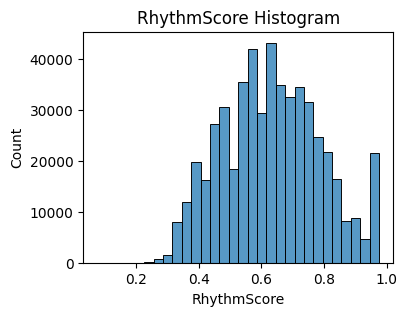

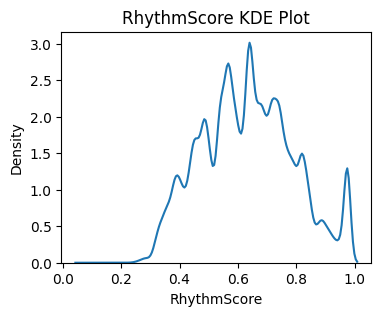

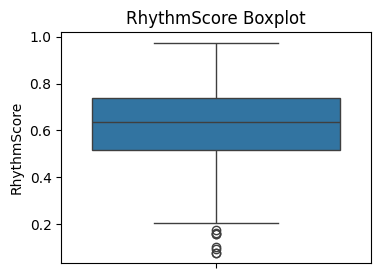

In [8]:
show_univariate_analysis(df_train, 'RhythmScore')

AudioLoudness
count    524164.000000
mean         -8.379014
std           4.616221
min         -27.509725
25%         -11.551933
50%          -8.252499
75%          -4.912298
max          -1.357000
Name: AudioLoudness, dtype: float64


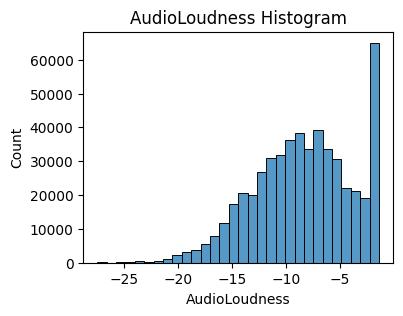

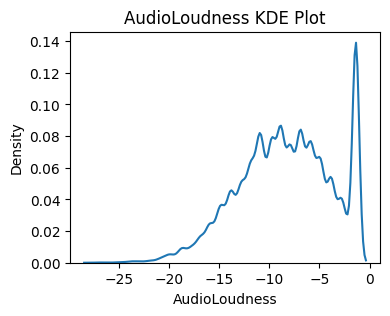

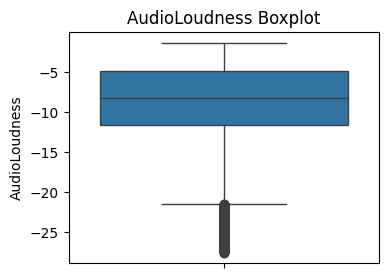

In [9]:
show_univariate_analysis(df_train, 'AudioLoudness')

VocalContent
count    524164.000000
mean          0.074443
std           0.049939
min           0.023500
25%           0.023500
50%           0.066425
75%           0.107343
max           0.256401
Name: VocalContent, dtype: float64


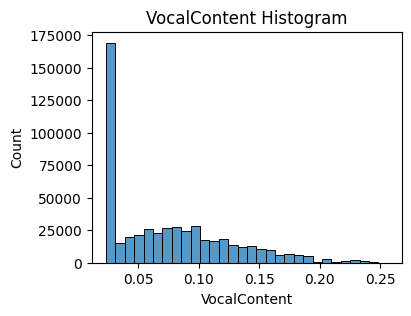

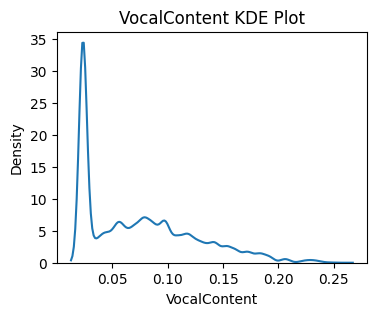

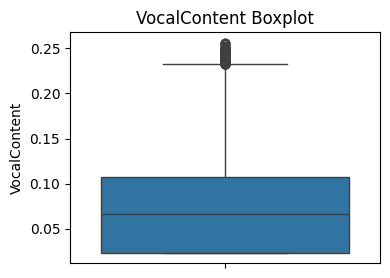

In [10]:
show_univariate_analysis(df_train, 'VocalContent')

AcousticQuality
count    524164.000000
mean          0.262913
std           0.223120
min           0.000005
25%           0.069413
50%           0.242502
75%           0.396957
max           0.995000
Name: AcousticQuality, dtype: float64


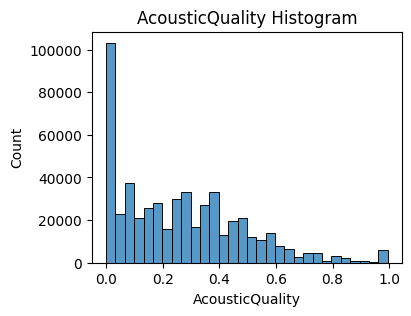

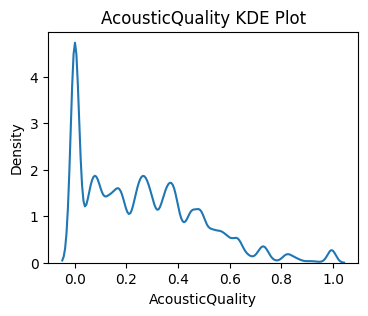

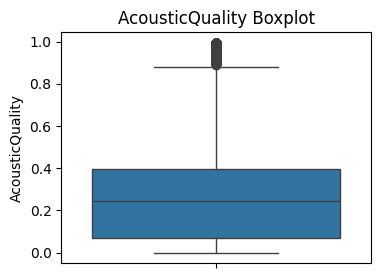

In [11]:
show_univariate_analysis(df_train, 'AcousticQuality')

InstrumentalScore
count    524164.000000
mean          0.117690
std           0.131845
min           0.000001
25%           0.000001
50%           0.074247
75%           0.204065
max           0.869258
Name: InstrumentalScore, dtype: float64


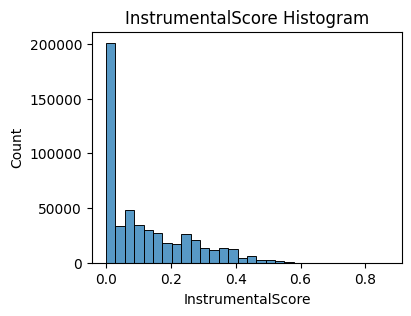

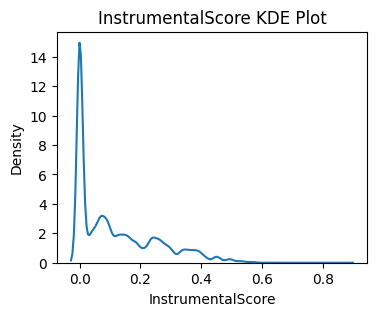

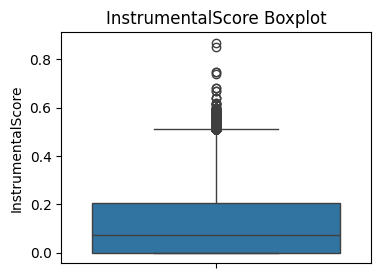

In [12]:
show_univariate_analysis(df_train, 'InstrumentalScore')

LivePerformanceLikelihood
count    524164.000000
mean          0.178398
std           0.118186
min           0.024300
25%           0.077637
50%           0.166327
75%           0.268946
max           0.599924
Name: LivePerformanceLikelihood, dtype: float64


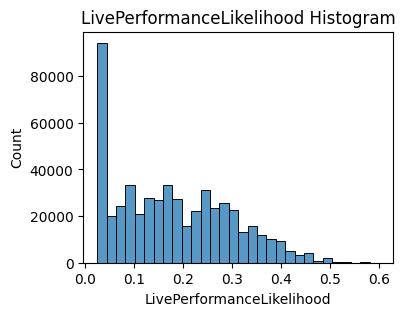

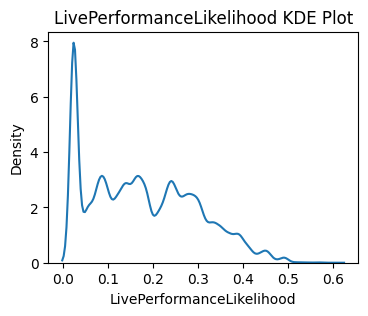

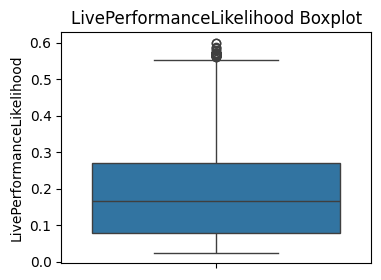

In [13]:
show_univariate_analysis(df_train, 'LivePerformanceLikelihood')

MoodScore
count    524164.000000
mean          0.555843
std           0.225480
min           0.025600
25%           0.403921
50%           0.564817
75%           0.716633
max           0.978000
Name: MoodScore, dtype: float64


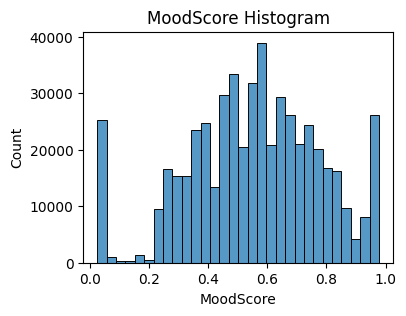

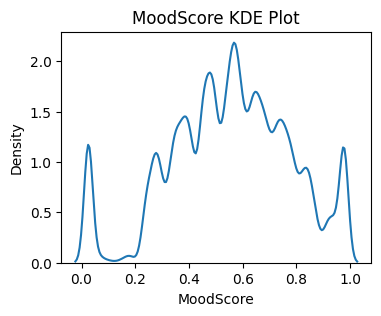

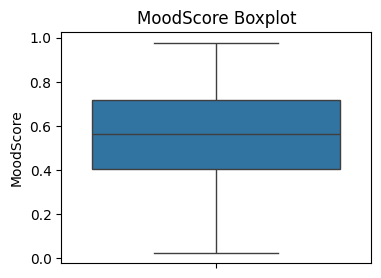

In [14]:
show_univariate_analysis(df_train, 'MoodScore')

TrackDurationMs
count    524164.000000
mean     241903.692949
std       59326.601501
min       63973.000000
25%      207099.876625
50%      243684.058150
75%      281851.658500
max      464723.228100
Name: TrackDurationMs, dtype: float64


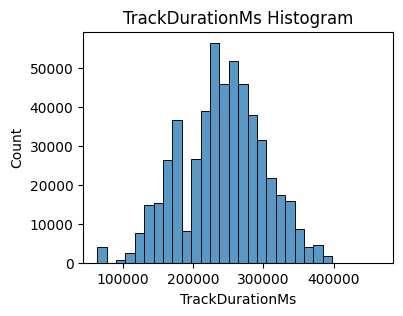

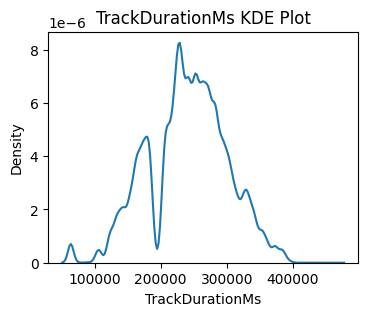

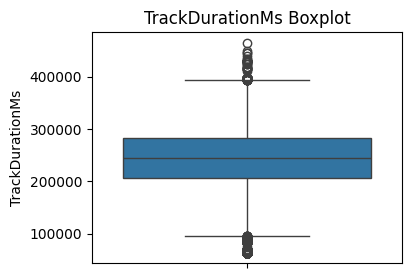

In [15]:
show_univariate_analysis(df_train, 'TrackDurationMs')

Energy
count    524164.000000
mean          0.500923
std           0.289952
min           0.000067
25%           0.254933
50%           0.511800
75%           0.746000
max           1.000000
Name: Energy, dtype: float64


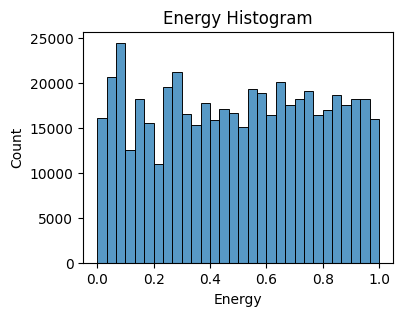

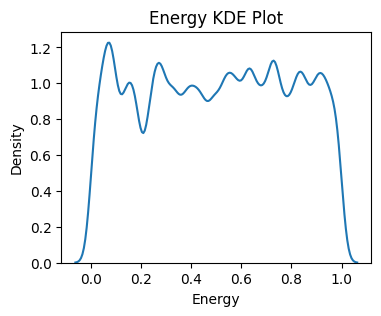

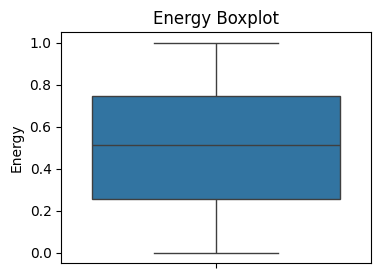

In [16]:
show_univariate_analysis(df_train, 'Energy')

### Correlation

Goal : see the linear relationship between each feature and the target variable

Key Takeaways:
- Seems like there is no feature with particularly strong linear relationship with the target variable (`BeatsPerMinute`).
- A relatively strong linear correlation between `VocalContent` and `LivePerformanceLikelihood`.
- `Energy` feature has strong linear correlation with `RhythmScore`, `AcousticQuality`, `LivePerformanceLikelihood`, and `MoodScore`. It's possible that `Energy` is a derivation of these other features, but not confirmed.

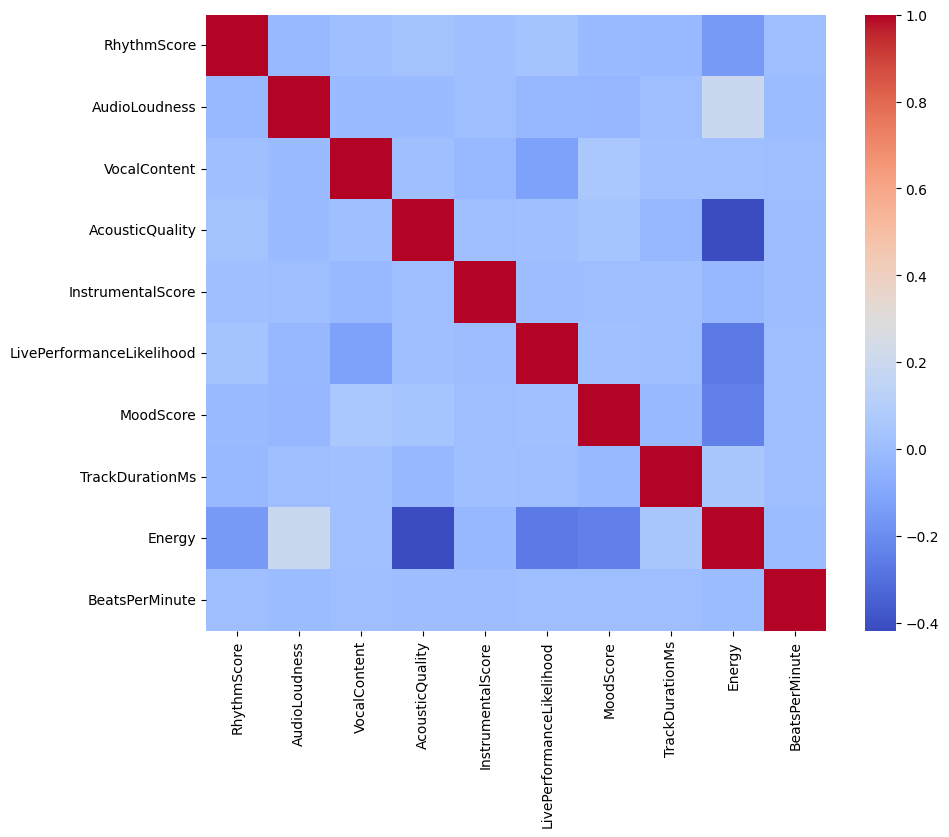

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.drop(columns=['id']).corr(), cmap="coolwarm")
plt.show()

### Bivariate Analysis

Goal : see how one variable affects another

In [18]:
#define feature pairs with relatively strong correlation according to the heatmap:
feat_pairs = [
    ("VocalContent", "LivePerformanceLikelihood"),
    ("Energy", "RhythmScore"),
    ("Energy", "AudioLoudness"),
    ("Energy", "AcousticQuality"),
    ("Energy", "LivePerformanceLikelihood"),
    ("Energy", "MoodScore"),
]

VocalContent x LivePerformanceLikelihood


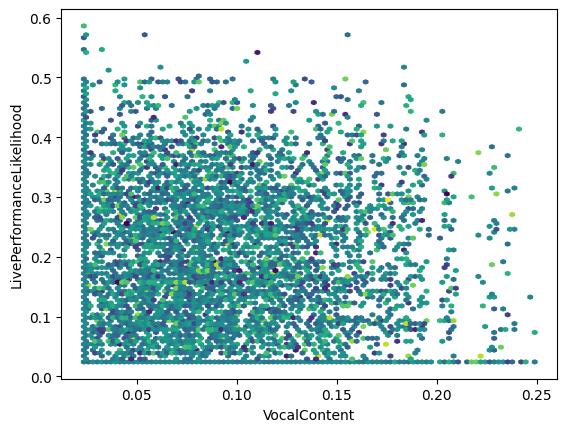

Energy x RhythmScore


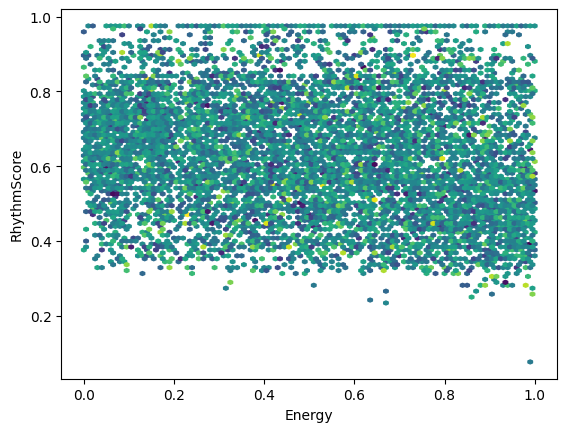

Energy x AudioLoudness


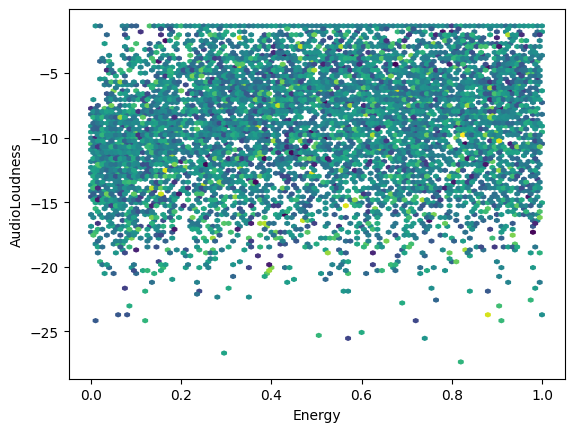

Energy x AcousticQuality


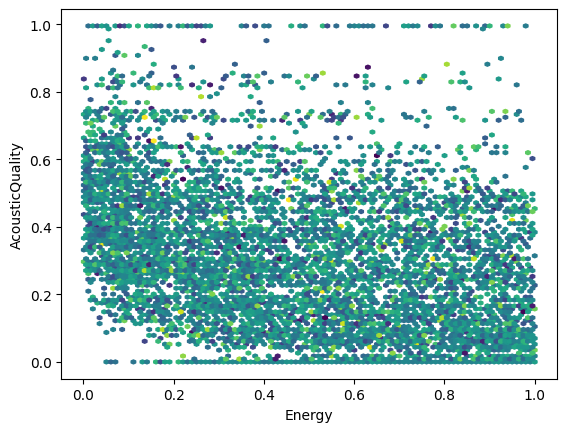

Energy x LivePerformanceLikelihood


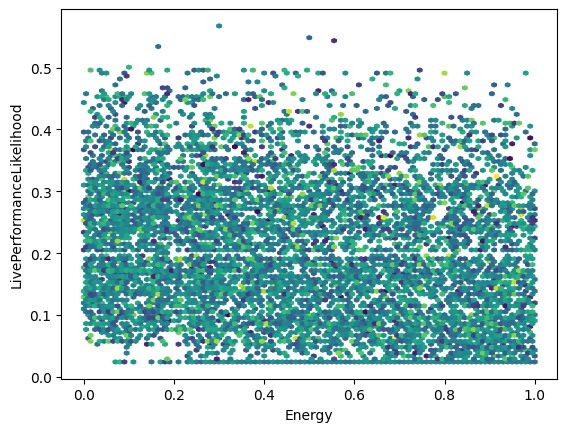

Energy x MoodScore


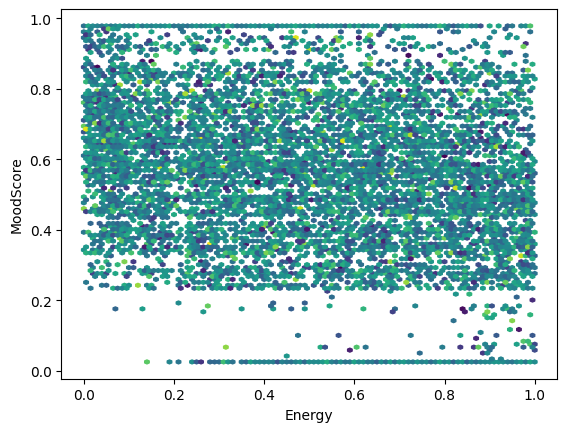

In [19]:
for f1, f2 in feat_pairs:
    print(f"{f1} x {f2}")
    df_plot = df_train.sample(n=10000, replace=False) #sample 10k to make visualization clearer
    # sns.scatterplot(x=f1, y=f2, hue='BeatsPerMinute', data=df_plot)
    plt.hexbin(x=df_plot[f1], y=df_plot[f2], C=df_plot['BeatsPerMinute'])
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.show()

### Quick POC Modeling - to get a sense of feature importance

Key Takeaways : 
- `TrackDurationMs`, `Energy`, `MoodScore`, `AudioLoudness`, and `RhythmScore` seems to be considered more informative compared to the other features

In [20]:
#for POC, sample a portion of the original data for faster iteration
df = df_train.sample(frac=0.10, random_state=1)

X = df.drop(columns=['id', 'BeatsPerMinute'])
y = df['BeatsPerMinute']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(41932, 9)
(10484, 9)


In [21]:
#train a quick Random Forest model to get an idea of feature importances
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
y_preds = model.predict(X_test)
print(f"RMSE : {root_mean_squared_error(y_test, y_preds):.3f}")

RMSE : 26.868


In [23]:
# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)

TrackDurationMs              0.128295
Energy                       0.125741
RhythmScore                  0.124595
MoodScore                    0.118362
AudioLoudness                0.113094
LivePerformanceLikelihood    0.107146
AcousticQuality              0.104905
VocalContent                 0.091798
InstrumentalScore            0.086064
dtype: float64

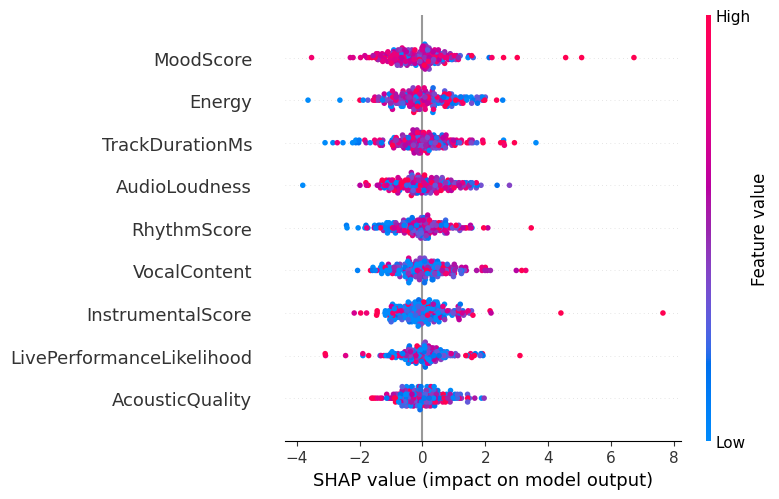

In [24]:
#Checking SHAP values
explainer = shap.TreeExplainer(model)
X_test_sample = X_test.sample(200) #sample for speed
shap_values = explainer(X_test_sample)
shap.summary_plot(shap_values, features=X_test_sample, feature_names=X_test_sample.columns)

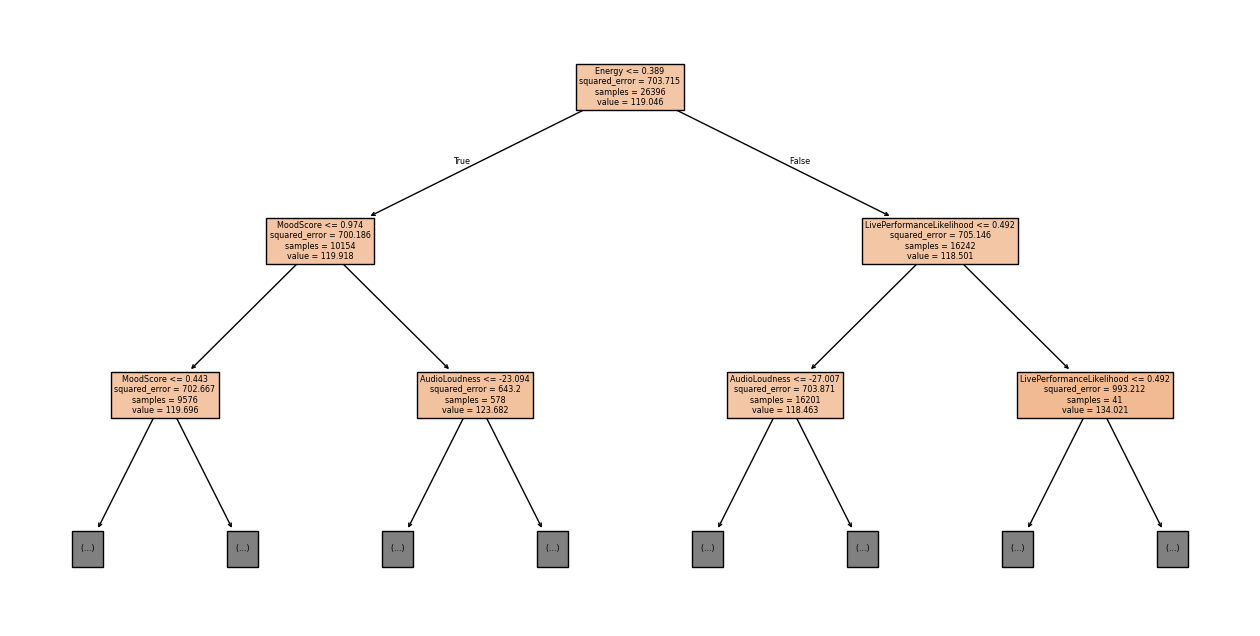

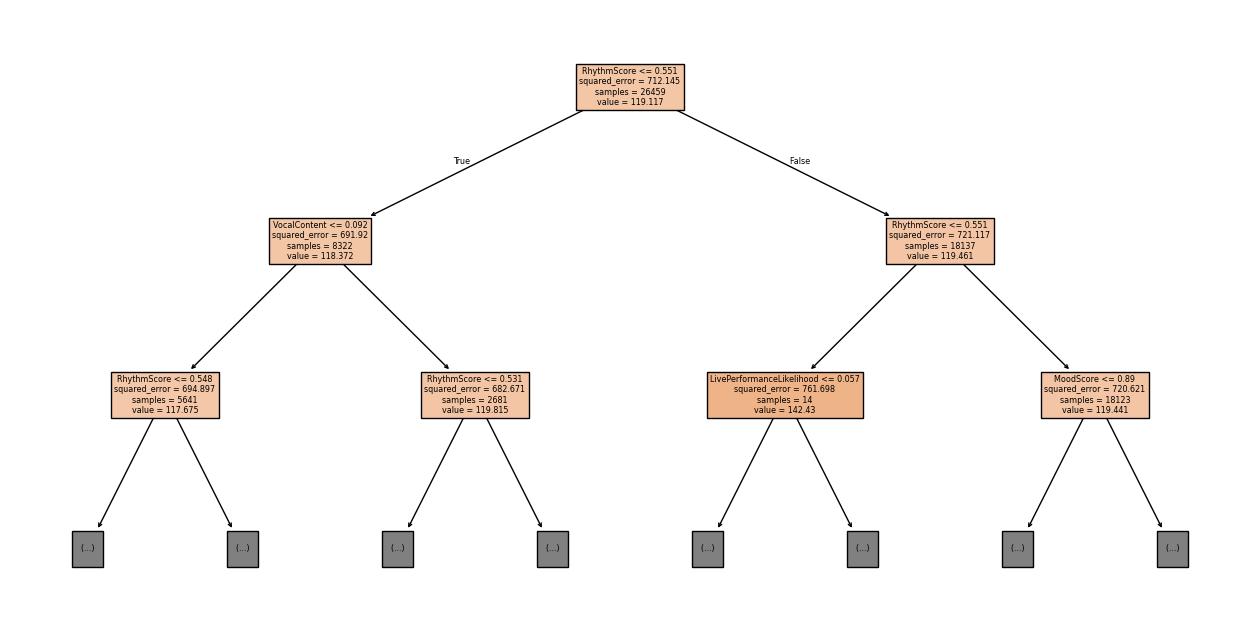

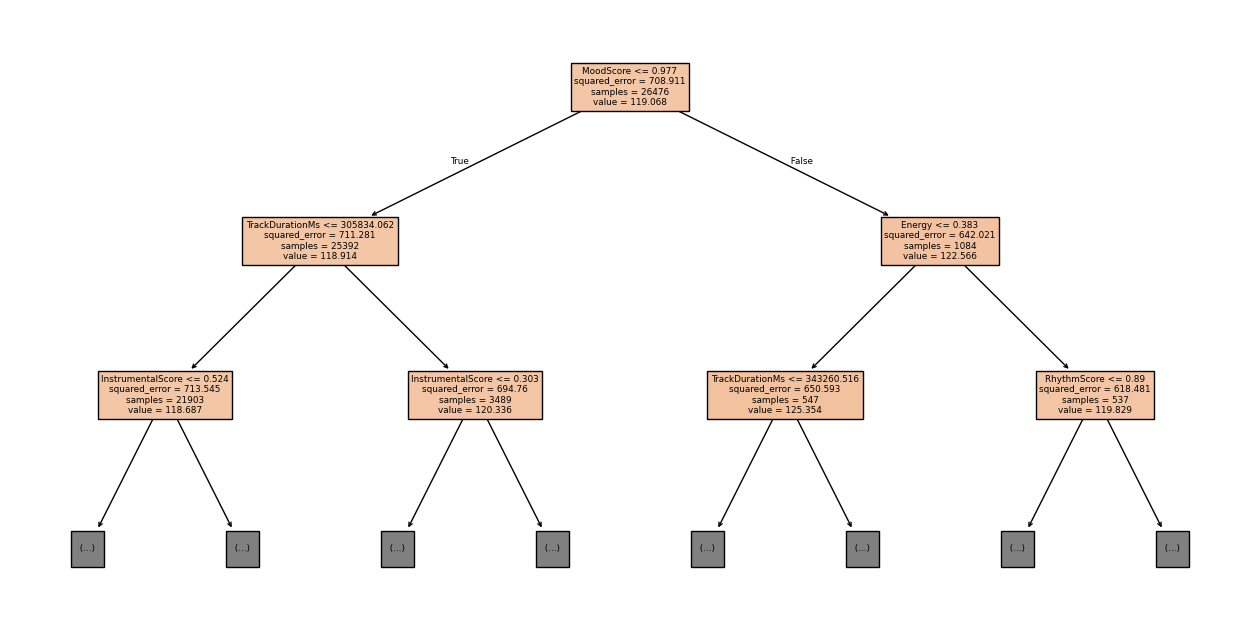

In [25]:
#Plot some sample trees
for i in range(3):
    sample_estimator = model.estimators_[i]

    plt.figure(figsize=(16, 8))
    plot_tree(
        sample_estimator,
        feature_names=X_train.columns,
        max_depth=2,
        filled=True
    )
    plt.show()